In [41]:
import matplotlib.pyplot as plt
import numpy as np


In [42]:
NUM_TRIALS = 2000
EPS = 0.01
BANDIT_PROBABILITIES = [0.25, 0.5, 0.75]

In [43]:
class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p
    self.p_estimate = 3.
    self.N = 1. # num samples collected so far

  def pull(self):
    # draw a 1 with probablity p
    return np.random.random() < self.p

  def update (self, x):
    self.N += 1.
    self.p_estimate =((self.N - 1) * self.p_estimate + x) / self.N

In [44]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)

  for i in range(NUM_TRIALS):
    best_win = np.argmax([b.p_estimate for b in bandits])
    # pull the arm for the bandit with the largest sample
    x = bandits[best_win].pull()

    # update rewards log
    rewards[i] = x

    # update the destribution for the bandit whose arm we just pulled
    bandits[best_win].update(x)

  for b in bandits:
    print("mean estimate: ", b.p_estimate)

  # print total reward
  print("total reward earned: ", rewards.sum())
  print("overall win rate: ", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit: ", [b.N for b in bandits])

  # plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0,1])
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
  plt.show()

mean estimate:  0.75
mean estimate:  0.75
mean estimate:  0.7715148465022647
total reward earned:  1536.0
overall win rate:  0.768
num times selected each bandit:  [4.0, 12.0, 1987.0]


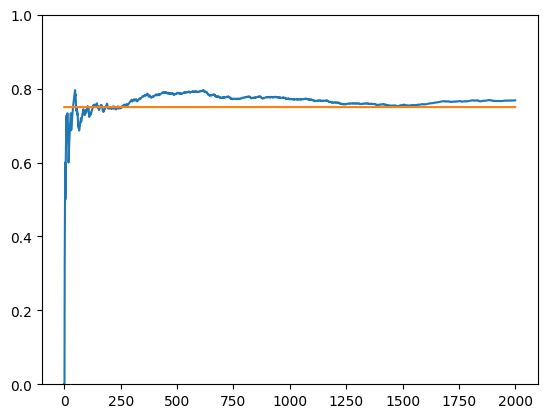

In [49]:
experiment()